# plotting functions for supplementary figure 7
This figure shows the results of a 3DFlex model trained on the C3-C3b steered MD dataset. The panels are largely the same as figure 5 in the manunscript


In [2]:
# imports
import os
import gemmi
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# roodmus
from roodmus.analysis.utils import load_data
from roodmus.analysis.utils import IO
from roodmus.heterogeneity.plot_heterogeneous_reconstruction import plot_latent_space_scatter

## panel C
plotting the latent space of the C3-C3b steered MD dataset

In [5]:
# data loading
project_dir = "/home/mjoosten1/projects/roodmus/data/c3c3b"
config_dir = os.path.join(project_dir, "mrc")
figures_dir = os.path.join(project_dir, "figures")
meta_file = os.path.join(project_dir, "cryoSPARC", "J685_passthrough_particles.cs")
jobtypes = {
    os.path.join(project_dir, "cryoSPARC", "J685_passthrough_particles.cs"): "3DFlex zdim=1"
}
latent_file = os.path.join(project_dir, "cryoSPARC", "J685_latents_011072.cs")
dt = 0.01 # ps interval between frames

particle_diameter = 100 # approximate particle diameter in Angstroms
ugraph_shape = (4000, 4000) # shape of the micrograph in pixels. Only needs to be given if the metadata file is a .star file
verbose = True
ignore_missing_files = True
enable_tqdm = True

analysis = load_data(meta_file, config_dir, particle_diameter, ugraph_shape=ugraph_shape, verbose=verbose, enable_tqdm=enable_tqdm, ignore_missing_files=ignore_missing_files) # creates the class
df_picked = pd.DataFrame(analysis.results_picking)
df_truth = pd.DataFrame(analysis.results_truth)
df_precision, df_picked = analysis.compute_precision(df_picked, df_truth, verbose=verbose)
print(f"mean precision: {df_precision['precision'].mean()}")
print(f"mean recall: {df_precision['recall'].mean()}")

latent_space, ndim = IO.get_latents_cs(latent_file)
print(f"latent space dimensionality: {ndim}")
print(latent_space.shape)
for i in range(ndim):
    df_picked["latent_{}".format(i)] = latent_space[:, i]
df_picked.tail()

loading metadata from /home/mjoosten1/projects/roodmus/data/c3c3b/cryoSPARC/J685_passthrough_particles.cs...
loaded metadata from /home/mjoosten1/projects/roodmus/data/c3c3b/cryoSPARC/J685_passthrough_particles.cs. determined file type: cs


Dictionaries now contain 96000 reconstructed particles
added 96000 particles from /home/mjoosten1/projects/roodmus/data/c3c3b/cryoSPARC/J685_passthrough_particles.cs


loading truth data: 100%|██████████| 786/786 [12:45<00:00,  1.03it/s, micrograph=000793.mrc]


Loaded ground-truth particle positions from config files
Dictionaries now contain 96000 particles and 196500 true particles
Added 196500 particles from /home/mjoosten1/projects/roodmus/data/c3c3b/mrc
For each micrograph, for each metadata file, compute the precision, recall and multiplicity
Speed of computation depends on the number of particles in the micrograph. progressbar is not accurate
Total number of groups to loop over: 786
Number of micgrographs: 786
Number of metadata files: 1
Starting loop over groups


computing precision: 100%|██████████| 786/786 [00:59<00:00, 13.13it/s, precision=0.989, recall=0.382, multiplicity=0.392]


time taken to compute precision: 60.29331994056702
mean precision: 0.9952549365508312
mean recall: 0.4981609435816187
latent space dimensionality: 2
(96000, 2)


,metadata_filename,ugraph_filename,position_x,position_y,euler_phi,euler_theta,euler_psi,ugraph_shape,defocusU,defocusV,class2D,TP,closest_dist,closest_particle,closest_pdb,closest_pdb_index,latent_0,latent_1
95995,/home/mjoosten1/projects/roodmus/data/c3c3b/cr...,000793.mrc,1092.800049,1143.200073,1.858983,2.527920,1.047396,"[4000, 4000]",9726.480469,9717.348633,2,True,6.876573,15,/home/mjoosten1/projects/roodmus/data/c3c3b/pd...,133.0,0.389333,0.688000
95996,/home/mjoosten1/projects/roodmus/data/c3c3b/cr...,000793.mrc,2265.599854,2161.600098,0.070980,1.672504,-0.261382,"[4000, 4000]",9704.952148,9695.820312,27,True,2.179103,55,/home/mjoosten1/projects/roodmus/data/c3c3b/pd...,492.0,0.240000,0.688000
95997,/home/mjoosten1/projects/roodmus/data/c3c3b/cr...,000793.mrc,1057.599976,3587.199951,-0.407007,1.936959,-2.697126,"[4000, 4000]",9689.292969,9680.161133,6,True,7.146267,8,/home/mjoosten1/projects/roodmus/data/c3c3b/pd...,73.0,0.560000,-0.645333
95998,/home/mjoosten1/projects/roodmus/data/c3c3b/cr...,000793.mrc,1928.799927,1196.000000,-2.651247,1.299694,1.415360,"[4000, 4000]",9713.693359,9704.561523,22,True,42.336894,234,/home/mjoosten1/projects/roodmus/data/c3c3b/pd...,1887.0,0.176000,0.336000
95999,/home/mjoosten1/projects/roodmus/data/c3c3b/cr...,000793.mrc,408.800018,513.599976,-0.469199,2.042846,-1.364351,"[4000, 4000]",9755.710938,9746.579102,7,True,3.326736,150,/home/mjoosten1/projects/roodmus/data/c3c3b/pd...,1252.0,-0.272000,-0.272000


number of FP: 359
number of TP: 95641
saved figure to: /home/mjoosten1/projects/roodmus/data/c3c3b/figures/J685_latents_011072.cs_0_1.png


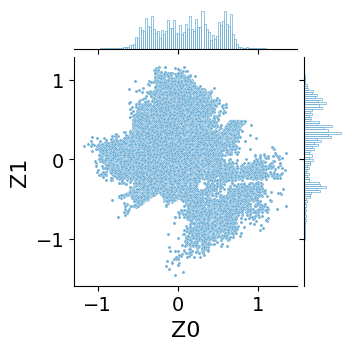

In [6]:
# latent space scatter plot
dim1=0
dim2=1

grid = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    pca=False
)
df_FP = df_picked[df_picked["TP"]==0]
print(f"number of FP: {len(df_FP)}")
print(f"number of TP: {len(df_picked)-len(df_FP)}")
ax = grid.figure.get_axes()[0]
# sns.scatterplot(
#     data=df_FP,
#     x=f"latent_{dim1}",
#     y=f"latent_{dim2}",
#     color="red",
#     s=10,
#     ax=ax,
#     label="FP",
# )
grid.set_axis_labels(f"Z{dim1}", f"Z{dim2}", fontsize=16)
grid.figure.get_axes()[0].tick_params(axis="both", which="major", labelsize=14)

outfilename = os.path.join(figures_dir, f"{os.path.basename(latent_file)}_{dim1}_{dim2}.png")
# grid.figure.savefig(outfilename, dpi=600, bbox_inches="tight")
print(f"saved figure to: {outfilename}")

## panel D
plotting the latent space with each point coloured by the timepoint in the MD trajectory

saved figure to: /home/mjoosten1/projects/roodmus/data/c3c3b/figures/J685_latents_011072.cs_latent_space_scatter_colored_by_closest_pdb_index_pca.png


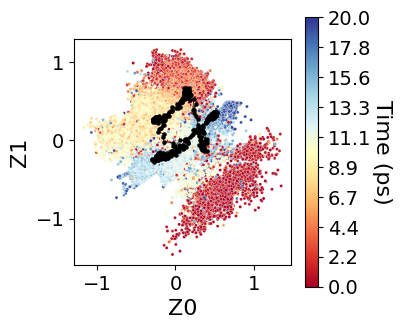

In [12]:
# latent space scatter plot, coloured by ground truth frames
dim1=0
dim2=1

fig, ax = plot_latent_space_scatter(
    df_picked,
    dim_1=dim1,
    dim_2=dim2,
    color_by="closest_pdb_index",
    palette="RdYlBu",
    pca=False,
)
# remove legend and add colorbar for the closest_pdb_index
ax.legend_.remove()
S_m = plt.cm.ScalarMappable(cmap="RdYlBu")
S_m.set_array(df_picked["closest_pdb_index"])
cbar = plt.colorbar(S_m)
cbar.set_label("Time (ps)", rotation=270, labelpad=15, fontsize=16) # time in ps
# change the tick labels on the colorbar to go from 0 to 10 us
cbar.set_ticks(np.linspace(1, df_picked["closest_pdb_index"].max(), 10))
xticklabels = [np.round(r, 1) for r in np.linspace(1, df_picked["closest_pdb_index"].max(), 10)*dt]
cbar.set_ticklabels(xticklabels, fontsize=14)
ax.set_xlabel(f"Z{dim1}", fontsize=16)
ax.set_ylabel(f"Z{dim2}", fontsize=16)
ax.tick_params(labelsize=14)

# add trajectory to the plot
# trajectory_file = os.path.join(project_dir, "cryosparc_P51_J696_series_000", "trajectory.txt")
# trajectory = np.loadtxt(trajectory_file)

# ax.scatter(trajectory[:, 0], trajectory[:, 1], s=5, c="black", zorder=10)
# ax.plot(trajectory[:, 0], trajectory[:, 1], c="black", zorder=10, linewidth=0.5)
# ax.set_aspect("equal")

# add trajectory to the plot
N_volumes = 500
pdb_indices = np.unique(df_picked["closest_pdb_index"])
d_pdbs = len(pdb_indices) // N_volumes

trajectory = np.zeros((N_volumes, ndim))
for i in range(N_volumes):
    pdb_group = pdb_indices[i*d_pdbs:(i+1)*d_pdbs]
    mean_latent = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)].agg(
        {f"latent_{i}": "mean" for i in range(ndim)}
    )
    trajectory[i] = mean_latent.values

ax.scatter(trajectory[:, 0], trajectory[:, 1], s=5, c="black", zorder=10)
ax.plot(trajectory[:, 0], trajectory[:, 1], c="black", zorder=10, linewidth=0.5)
ax.set_aspect("equal")

outfilename = os.path.join(figures_dir, f"{os.path.basename(latent_file)}_latent_space_scatter_colored_by_closest_pdb_index_pca.png")
# fig.savefig(outfilename, bbox_inches="tight", dpi=600)
print(f"saved figure to: {outfilename}")


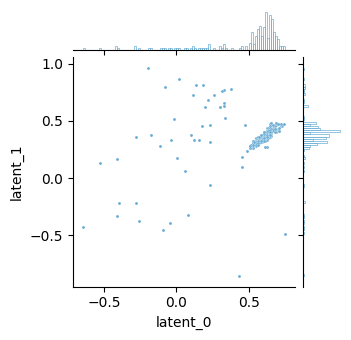

In [25]:
# plot only the latent space for the first 1/500 th of pdb indices
pdb_indices = np.unique(df_picked["closest_pdb_index"])
N_volumes = 500
d_pdbs = len(pdb_indices) // N_volumes

i = 499

pdb_group = pdb_indices[i*d_pdbs:(i+1)*d_pdbs]
df_picked_subset = df_picked[df_picked["closest_pdb_index"].isin(pdb_group)]
grid = plot_latent_space_scatter(
    df_picked_subset,
    dim_1=dim1,
    dim_2=dim2,
    pca=False,
)



## panel E
plotting the correlation matrix between the MD trajectory and sampled volumes from the 3DFlex model

saved figure to: /home/mjoosten1/projects/roodmus/data/c3c3b/figures/J685_latents_011072.cs_correlation_matrix.pdf


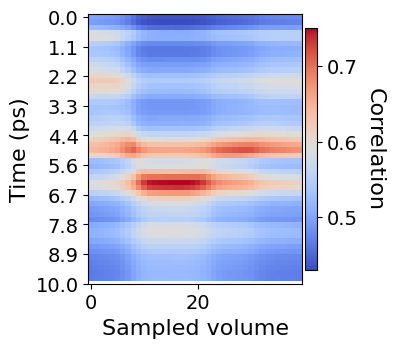

In [9]:
# plot the correlation matrix
project_dir = "/home/mjoosten1/projects/roodmus/data/c3c3b"
figures_dir = os.path.join(project_dir, "figures")
correlation_matrix_file = os.path.join(project_dir, "cryosparc_P51_J696_series_000", "correlation_matrix.npy")
correlation_matrix = np.load(correlation_matrix_file)
latent_file = os.path.join(project_dir, "cryoSPARC", "J685_latents_011072.cs")

frames = correlation_matrix.shape[0]

fig, ax = plt.subplots(figsize=(3.5, 3.5))
ax.imshow(correlation_matrix, cmap="coolwarm")
yticks = np.linspace(0, frames, 10)
yticklabels = np.round(np.linspace(0, 10, 10, dtype=float), 1)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
ax.set_ylabel("Time (ps)", fontsize=16)
ax.set_xlabel("Sampled volume", fontsize=16)
cbar = ax.figure.colorbar(ax.get_images()[0], ax=ax, orientation="vertical", pad=0.01, shrink=0.9)
cbar.ax.tick_params(labelsize=14)
cbar.ax.set_ylabel("Correlation", fontsize=16, rotation=270, labelpad=20)
ax.tick_params(axis="both", which="major", labelsize=14)

outfilename = os.path.join(figures_dir, f"{os.path.basename(latent_file)}_correlation_matrix.pdf")
# fig.savefig(outfilename, bbox_inches="tight")
print(f"saved figure to: {outfilename}")
